<a href="https://colab.research.google.com/github/muhammadhananbaloch/Deep-Learning/blob/main/simple_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [155]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [156]:
# Pick a manual seed for randomization
torch.manual_seed(20)
#Create an instance of model
model = Model()

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [159]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [160]:
# Change last column from string to integer
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [161]:
# Train Test Split! Set X,y
X = my_df.drop(columns='species')
y = my_df['species']

In [162]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [165]:
# Convert X features to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [166]:
# Convert y label to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [167]:
# Set the criterion of model to measure the error, how far off the  predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate(if error doesn't go down after a bunch of iteration (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [168]:
# Train our model!
# Epochs? (one run through all the training data in our network)

epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy()) #Convert tensor to numpy

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1048375368118286
Epoch: 10 and loss: 0.8352535963058472
Epoch: 20 and loss: 0.5333452224731445
Epoch: 30 and loss: 0.3803027868270874
Epoch: 40 and loss: 0.2783735394477844
Epoch: 50 and loss: 0.19204112887382507
Epoch: 60 and loss: 0.1263255476951599
Epoch: 70 and loss: 0.09083087742328644
Epoch: 80 and loss: 0.07346073538064957
Epoch: 90 and loss: 0.0639343112707138


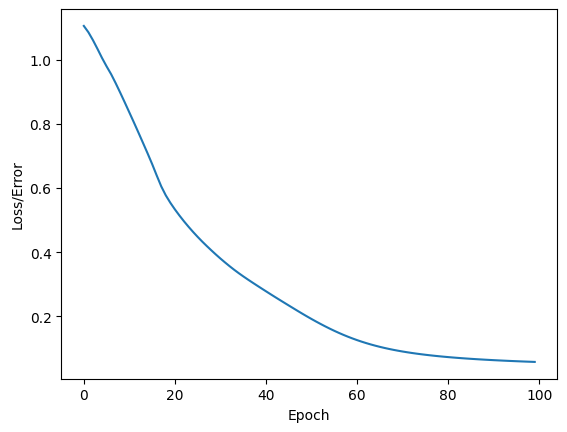

In [169]:
# Graph it our!
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.show()

In [170]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [171]:
loss

tensor(0.0743)

In [172]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([  9.5443,   3.6612, -15.5402]) 	 0 	 0
2.) tensor([-2.8127,  5.0112,  1.0776]) 	 1 	 1
3.) tensor([-1.4777,  5.5927, -1.1579]) 	 1 	 1
4.) tensor([-5.6795,  4.2858,  5.6519]) 	 2 	 2
5.) tensor([-0.7597,  5.3344, -2.0454]) 	 1 	 1
6.) tensor([-2.2615,  4.6772,  0.5307]) 	 1 	 1
7.) tensor([-7.9733,  2.8990,  9.8176]) 	 2 	 2
8.) tensor([ 10.2606,   3.9115, -16.7095]) 	 0 	 0
9.) tensor([-7.6124,  2.7513,  9.4041]) 	 2 	 2
10.) tensor([  9.6916,   3.6522, -15.7224]) 	 0 	 0
11.) tensor([-5.8109,  3.6755,  6.2471]) 	 2 	 2
12.) tensor([-3.0779,  5.1481,  1.4163]) 	 1 	 1
13.) tensor([-5.7012,  3.1483,  6.4229]) 	 2 	 2
14.) tensor([ 10.1020,   3.6888, -16.3071]) 	 0 	 0
15.) tensor([ 10.4193,   3.8470, -16.8702]) 	 0 	 0
16.) tensor([-9.2485,  2.6725, 11.7949]) 	 2 	 2
17.) tensor([  9.3563,   3.4830, -15.1511]) 	 0 	 0
18.) tensor([-2.2250,  5.5331, -0.0600]) 	 1 	 1
19.) tensor([-7.6500,  2.2010,  9.8296]) 	 2 	 2
20.) tensor([ 0.3836,  4.7065, -3.2615]) 	 1 	 1
21.) tensor